In [2]:
import os
import yake
from collections import Counter
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

from collections import defaultdict
import sys
import spacy
from spacy.lang.fr.examples import sentences

from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
data_path = "../data"
txt_path = '../data/txt'
temp_path = '../data/tmp'

files = os.listdir(data_path)
year = 1951

# S1 - Keywords

In [4]:
kw_extractor = yake.KeywordExtractor(lan="fr", top=50)

# Liste des fichiers de 1951
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]

for f in sorted(txts)[:100]:
    text = open(os.path.join(txt_path, f), 'r', encoding= 'utf-8').read()
    keywords = kw_extractor.extract_keywords(text)
    kept = []
    for kw, score in keywords:
        words = kw.split()
        if len(words) == 2:
            kept.append(kw)
    print(f"{f} mentions these keywords: {', '.join(kept)}...")

KB_JB838_1951-01-04_01-00009.txt mentions these keywords: rue Royale, Francis Croisset, Marthe Dugard., Bourse Tél, VENTE PUBLIQUE, UCCLE Rue, Enf. adm...
KB_JB838_1951-01-06_01-00004.txt mentions these keywords: prie d’annoncer, GENERAL Fonte, tient lieu, AVIS TIENT, MAUVAIS TEMPS, demeurant rue, jeune homme, Vendredi matin...
KB_JB838_1951-01-07_01-00002.txt mentions these keywords: îles Kerguélen, Georges Bidault, Pierre Loe, D’autres allergènes, l'enseignement religieux, devenir ouvertement...
KB_JB838_1951-01-11_01-00004.txt mentions these keywords: nous prie, demeurant rue, prie d’annoncer, SABENA poursuit, incendie s’est, habitant rue, tient lieu, d’une maison, MADAME VEUVE...
KB_JB838_1951-01-13_01-00012.txt mentions these keywords: Agence Rossel, Bel app, Ecrire Agence, louer maison, LOUER rue, Rossel numéro, app. mod...
KB_JB838_1951-01-16_01-00010.txt mentions these keywords: Agence Rossel, Chartreux Brux., Ecrire Agence, Bruxelles Tél, DAMES Dem, place dem, HAVAS BRUXELLES,

# S2 - Word Cloud

JEUDI 4 JANVIER 1951 LE SOIR 9 LES THEATRES Monnaie : Jeudi 4, à 20 h., « Le Jongleur de Notre-Dame » et « Bonsoir M. Pantalon ». Parc : Jeudi, en matinée et en soirée, spectacle littéraire : « L’Eper
JEUDI 4 JANVIER 1951 LE SOIR 9 LES THEATRES Monnaie : Jeudi 4, à 20 h., « Le Jongleur de Notre-Dame » et « Bonsoir M. Pantalon ». Parc : Jeudi, en matinée et en soirée, spectacle littéraire : « L’Epervler *, de Francis Croisset, avec Charles Gontler, Marthe Dugard. etc. Galeries : A partir de jeudi, les galas Karsenty, présentent « La soif », de Bernstein, avec Aimé Clariond. Vaudeville : Hâtez-vous d’aller applaudir le succès du moment : « Aux cocus réunis ». On annonce les dernières. Albambra 
janvier theatres monnaie jongleur dame bonsoir pantalon parc matinÃ©e soirÃ©e spectacle littÃ©raire epervler francis croisset charles gontler marthe dugard galeries partir galas karsenty prÃ©sentent soif bernstein aimÃ© clariond vaudeville hÃ¢tez aller applaudir succÃ¨s moment cocus rÃ©unis annonc

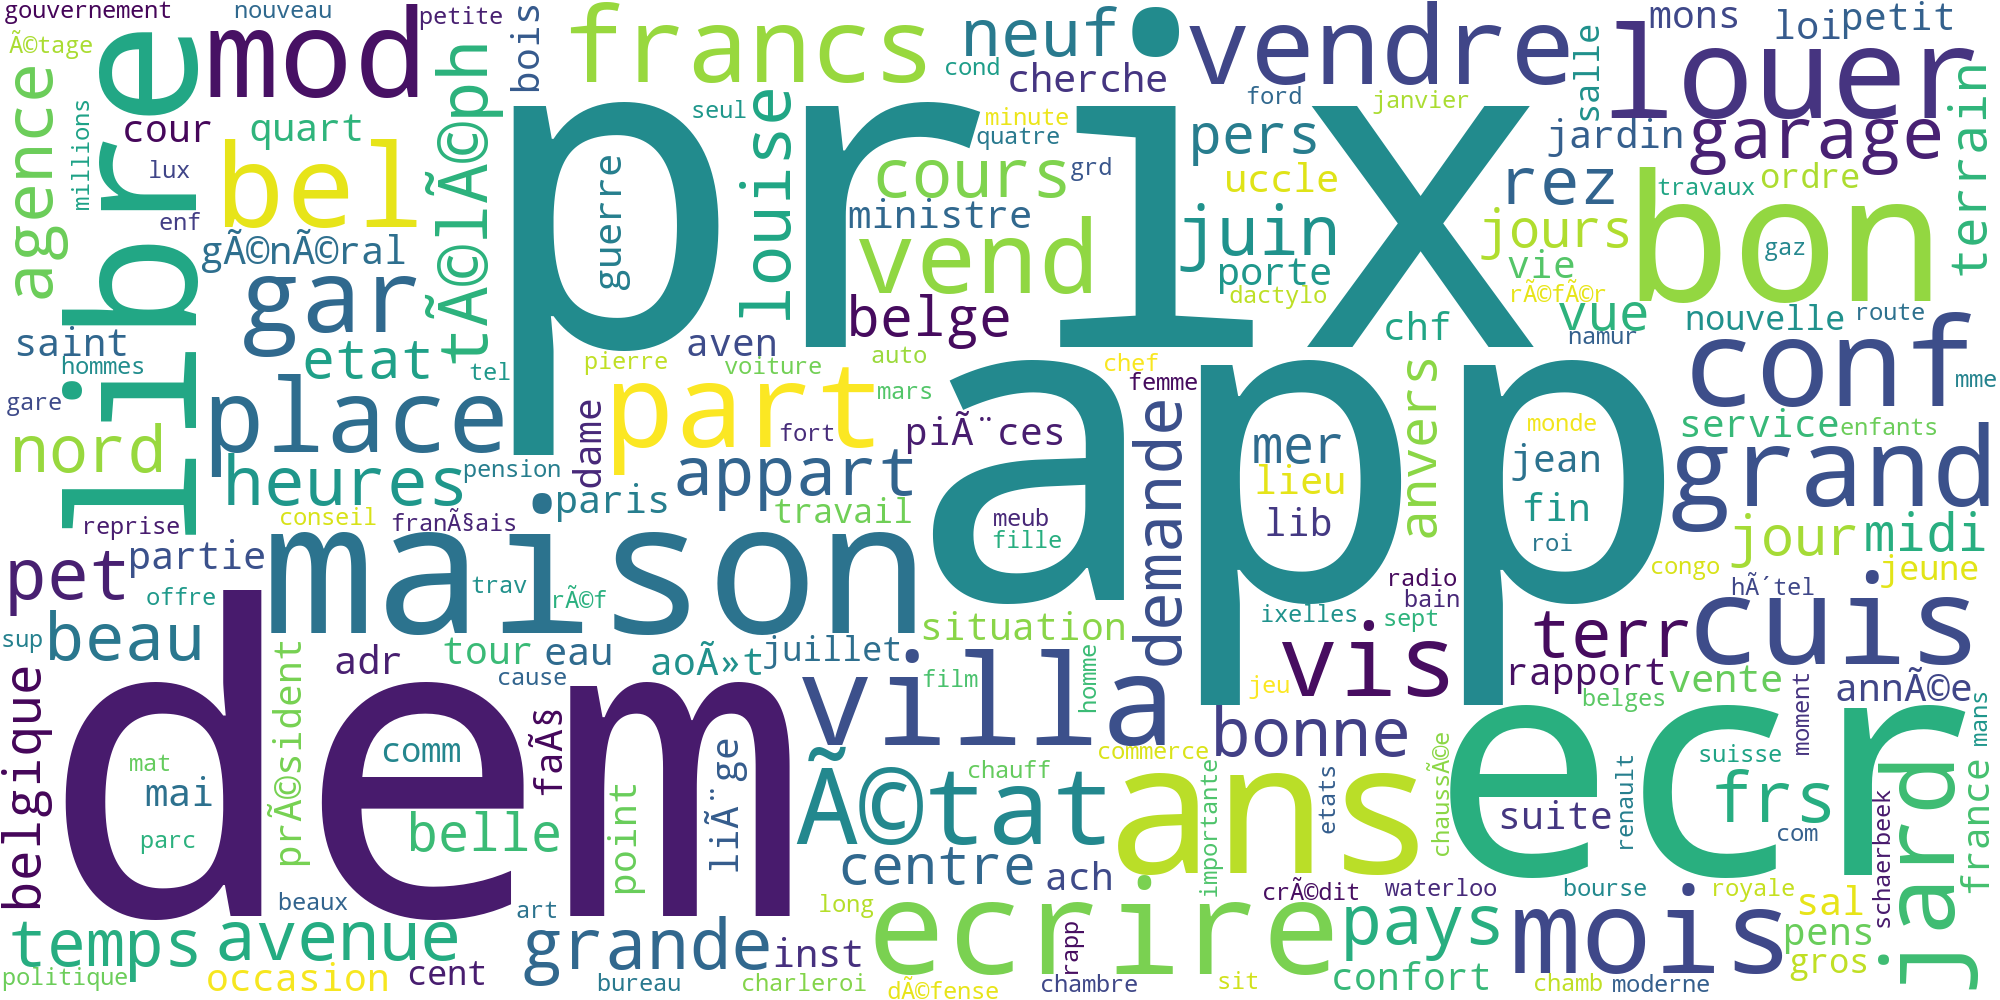

In [5]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'


# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "alors", "rossel", "vers", "avant", "tél", "rue", "déjà", "très", "des", "dès", "près", "chez", "comme", "etc",
       "car", "elles", "dés", "env","toujours", "jamais", "devant", "fois", "min", "max", "voir", "voit", "peu", "ceux", "celles", "quelque", "quelques",
       "plusieurs", "toute", "leurs", "tout","leur", "cher", "chère","bas","haut","premier","dernier", "première", "matin","soir","celui", "prés", "bruxelles", "brux", "lundi","mardi", "mercredi",
       "jeudi", "vendredi", "samedi", "dimanche", "rien"]
sw = set(sw)

# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

print(content_list[0][:200])


if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

print(before[:500])

clean_text(year, folder=temp_path)

# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r') as f:
    after = f.read()

print(after[:500])

frequencies = Counter(after.split())
print(frequencies.most_common(10))

cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))

# S3 - NER

In [6]:
nlp = spacy.load('fr_core_news_md')
n = 900000
# ouvrir le dossier temporaire
with open(os.path.join(temp_path, f'{year}_clean.txt'), encoding='utf-8') as file:
    text = file.read()[:n]

In [7]:
%%time
# Traiter le texte

doc = nlp(text)

CPU times: total: 17.3 s
Wall time: 17.3 s


In [8]:
data = {}
for ent in doc.ents:
    if ent.label_ == "PER" or ent.label_ == "LOC" or ent.label_ == "ORG":
        data[(ent.text, ent.label_)] = text.count(ent.text)
        #print(ent.text, ent.label_, text.count(ent.text))
        
for (ent_text, ent_label), occurences in sorted(data.items(), key= lambda x: x[1], reverse=True):
    print(ent_text, ent_label, occurences)
    

ter ORG 1895
ill ORG 1786
com ORG 1756
app LOC 1560
ine PER 1468
ren PER 1379
rie LOC 1374
rie PER 1374
anc ORG 1260
rai ORG 1213
ens PER 1199
ens ORG 1199
tan LOC 970
gar PER 828
dre LOC 821
pos PER 742
ecr PER 737
ecr ORG 737
ecr LOC 737
fra ORG 726
rem PER 613
cour LOC 578
imp PER 571
imp ORG 571
pla PER 554
ler LOC 549
ili PER 512
tal PER 500
eri LOC 483
ies LOC 481
sou PER 471
ind PER 467
ind ORG 467
pen PER 458
ann PER 451
ann ORG 451
pou PER 449
acc PER 445
ena ORG 411
trav PER 406
élé ORG 397
iers ORG 380
réf ORG 378
ret ORG 375
ori PER 347
fon ORG 336
lic ORG 334
occ LOC 333
repr PER 328
pol ORG 322
belg LOC 307
éci LOC 297
enf PER 290
enf LOC 290
adr ORG 287
rép PER 267
hon PER 260
poi LOC 260
poi ORG 260
urg PER 253
maison LOC 246
fac ORG 242
udi ORG 230
imm PER 222
imm LOC 222
ets ORG 217
fre ORG 212
loui PER 210
louis PER 206
fem ORG 192
fem PER 192
etat LOC 178
etat PER 178
mén ORG 172
dom PER 171
dom LOC 171
éte ORG 170
mons LOC 164
garn LOC 162
adi ORG 160
louise PER 15

# S4 - Sentiment Analysis

In [9]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    print(f"This text is {polarity_str} and {subjectivity_str}.")

In [10]:
get_sentiment("Léon Logier a participé à une vente illicite et le reconnaît.")

This text is 5% negative and perfectly objective.


In [11]:
get_sentiment("Mais d’autres prévenus disent avoir payé 37.500 francs à leur complice.")

This text is 16% positive and 0.31666666666666665% subjective.


In [12]:
get_sentiment("Subissant ainsi la pression soutenue des visités, les bleu et blanc doivent se résoudre à une défense serrée.")

This text is 3% positive and perfectly objective.


In [13]:
get_sentiment("De grandes artistes telles que Berthe Bovy, Marthe Dugard ont tenu à l’incarner et la créatrice du rôle à Bruxelles, Germaine Kaysen, a laissé un inoubliable souvenir.")

This text is 30% positive and 0.39999999999999997% subjective.


In [14]:
get_sentiment("M. Jadot fit rapport sur l’activité de l'année académique écoulée et insista sur la réorganisation des cours qui par le retour aux principes de bases et la création de cours à option, espère lutter contre le surmenage des étudiants.")

This text is neutral and perfectly objective.


In [15]:
get_sentiment("Il acheta un couteau à cran d’arrêt et prit le train pour Valenciennes, afin de se rendre à Trith- St-Léger, où réside son ex-amie afin de la tuer.")

This text is neutral and perfectly objective.


In [16]:
get_sentiment("L’an proohain, sans doute, Cobe peut être appelé à jouer un grand rôle dans la catégorie.")

This text is 30% positive and 0.2% subjective.


In [17]:
get_sentiment("Toute la première partie du film, qui se déroule dans le cadre tragique d’un village italien démoli, tout près de la ligne de feu, est d’une brillante exécution.")

This text is 20% positive and 0.35000000000000003% subjective.


In [18]:
get_sentiment("Le général Eisenhower inaugure le Collège de défense atlantique Devant la Commission politique de l’O.IS'.U")

This text is neutral and perfectly objective.


In [19]:
get_sentiment("Sa part, dans cette tragédie, fut spirituelle, et M. Jacob a raison de penser qu’avec elle, leur communion s’accrut.")

This text is 10% positive and 0.5% subjective.
